In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import configparser


In [27]:
config = configparser.ConfigParser()
config.read('dwh.cfg')

conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()


# Most Popular Songs

In [35]:
#https://docs.aws.amazon.com/redshift/latest/dg/r_concat_op.html
query = """
select songs.title || ',\n' || artists.name as song_artist,
       t.count_songplays
  from (select song_id,
        count(songplay_id) as count_songplays
        from songplays
        group by song_id) as t
  join 
      songs
  on 
      t.song_id = songs.song_id
  join artists
      on songs.artist_id = artists.artist_id
  order by t.count_songplays desc
  limit 10;
"""

Text(0.5,1,'Most Popular Songs')

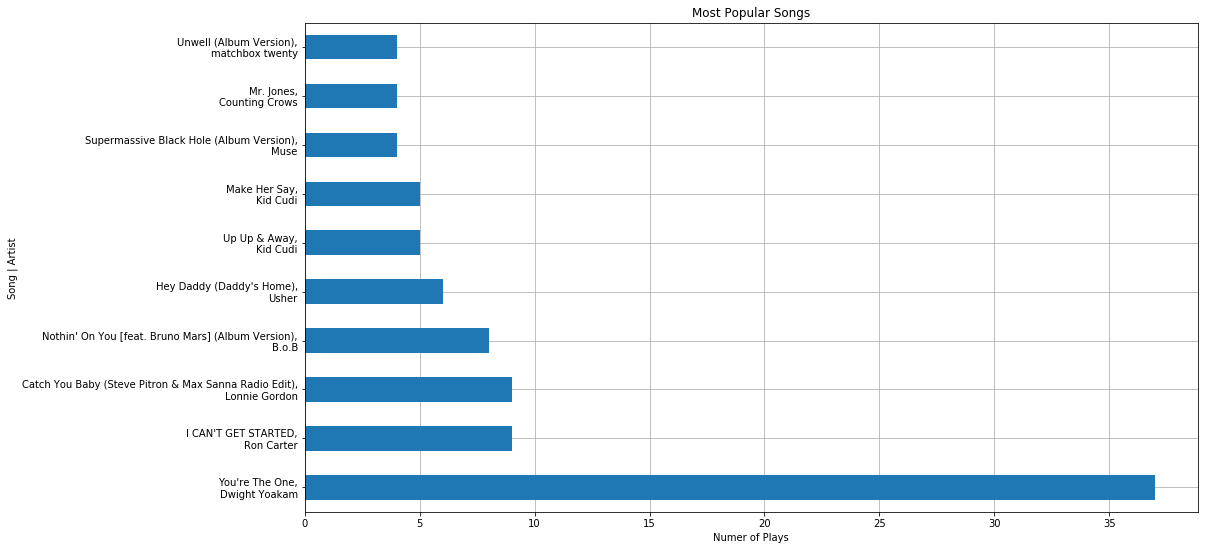

In [37]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html
pd.read_sql(query, conn).plot(kind="barh", x="song_artist", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=1)
ax.set_ylabel("Song | Artist")
ax.set_xlabel("Numer of Plays")

ax.set_title("Most Popular Songs")


# Most popular play times

In [31]:
query = """select t.hour as hour, count(t.hour)
from songplays
join time as t
on songplays.start_time = t.start_time
group by t.hour
order by hour desc"""


Text(0.5,1,'Most popular hour')

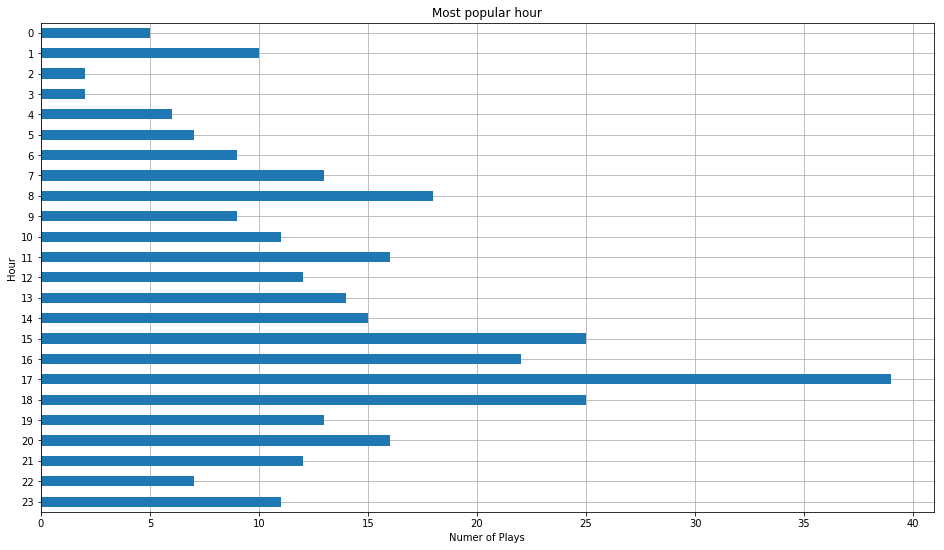

In [32]:
fig = plt.figure(figsize=(16,9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="hour", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=1)
ax.set_ylabel("Hour")
ax.set_xlabel("Numer of Plays")

ax.set_title("Most popular hour")